# Entanglement scaling in MERA systems

### Exact ground state energy including finite-size corrections

In [1]:
En=[-1.270005811417927, -1.2724314193572888, -1.2730375326245706, -1.273189042909428, -1.2732269193538452, -1.2732363883945284];
Ecorr = map( (x)-> (x+(4/pi)), En );
#coeff = map( (a,b) -> (b*(2^(2*a))), enumerate(Ecorr))

6-element Array{Float64,1}:
 0.00323373 
 0.000808125
 0.000202012
 5.05018e-5 
 1.26254e-5 
 3.15634e-6 

In [2]:
for (a,b) in enumerate(Ecorr)
    println(b*(81*2^(2*(a-1))))
end
println("--------------------")
pi/12

0.2619323986961051
0.2618326224311769
0.2618076953273878
0.2618014646094622
0.2617999070001247
0.2617995175808119
--------------------


0.2617993877991494

### Plotting entanglement of threesite reduced density matrices at each scale

In [3]:
using JLD

In [4]:
include("BinaryMERA.jl")
include("OptimizeMERA.jl")

improveGraft! (generic function with 2 methods)

In [5]:
function entropy(rho3site)
    U,S,Vdag=tensorsvd(rho3site, [1,2,3], [4,5,6])
    EE = mapreduce( (x) -> -x*log(x) , +, S)
    return EE
end

entropy (generic function with 1 method)

In [6]:
macro fm(i,chi)
    @show :(fill(chi, $(i)))
end

function fnstring(i,chi)
    filenamestring = "solutionMERA_$(i)layers_"*string(([8;@fm(i,chi)]...))*"shape.jld"
    return filenamestring
end

function getEntList(i::Int,chi::Int)
    filenamestring = fnstring(i,chi) |> eval
    #println(filenamestring)
    z=load(filenamestring,"m_$(i)layers");
    rlist=buildReverseRhosList(z) |> reverse; 
    Slist=map(entropy,rlist)
    return Slist
end

$(Expr(:quote, :(fill(chi,$(Expr(:$, :i)))))) = :(fill(chi,i))


getEntList (generic function with 1 method)

# The plots

In [14]:
cd("./fullrun9")

In [27]:
using PyPlot

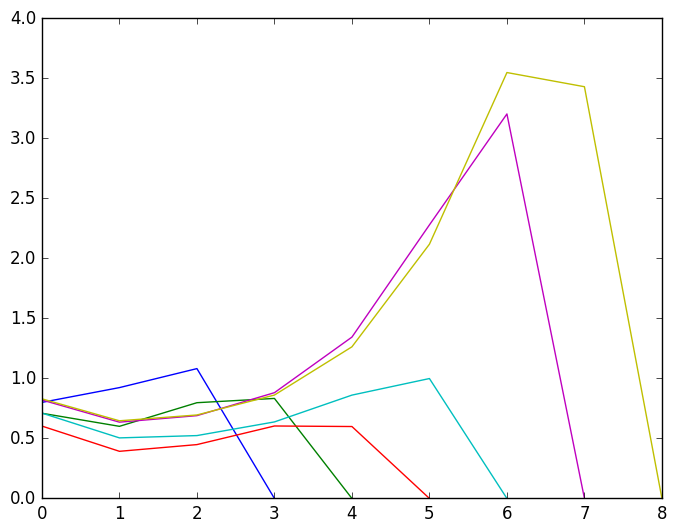

In [26]:
macro makeplt(i)
    return :(plot(collect(0:i), getEntList(i,5)))
end

for i in collect(3:8)
    @makeplt i
end